In [1]:
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from tabulate import tabulate

In [3]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1, 1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order=df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(100*height/total),
               ha="center")
    plt.show()

In [4]:
def determine_data_types(df):
    res = {}
    for col in df.columns:
        try:
            temp = [float(x) for x in df[col]]
            res[col] = 'Numerical'
        except:
            res[col] = 'Categorical'
    return res

In [5]:
def check_missing_values(df, name):
    print("Dataset: " + name)
    for col in df.columns:
        # count number of rows with missing values
        n_miss = df[[col]].isnull().sum()
        perc = n_miss / df.shape[0] * 100
        print('> '+ col +', Missing: %d (%.1f%%)' % (n_miss, perc))

## Attribute Information
Player 1 Name of Player 1

Player 2 Name of Player 2

Result Result of the match (0/1) - Referenced on Player 1 is Result = 1 if Player 1 wins 
(FNL.1>FNL.2)

FSP.1 First Serve Percentage for player 1 (Real Number)

FSW.1 First Serve Won by player 1 (Real Number)

SSP.1 Second Serve Percentage for player 1 (Real Number)

SSW.1 Second Serve Won by player 1 (Real Number)

ACE.1 Aces won by player 1 (Numeric-Integer)

DBF.1 Double Faults committed by player 1 (Numeric-Integer)

WNR.1 Winners earned by player 1 (Numeric)

UFE.1 Unforced Errors committed by player 1 (Numeric)

BPC.1 Break Points Created by player 1 (Numeric)

BPW.1 Break Points Won by player 1 (Numeric)

NPA.1 Net Points Attempted by player 1 (Numeric)

NPW.1 Net Points Won by player 1 (Numeric)

TPW.1 Total Points Won by player 1 (Numeric)

ST1.1 Set 1 result for Player 1 (Numeric-Integer)

ST2.1 Set 2 Result for Player 1 (Numeric-Integer)

ST3.1 Set 3 Result for Player 1 (Numeric-Integer)

ST4.1 Set 4 Result for Player 1 (Numeric-Integer)

ST5.1 Set 5 Result for Player 1 (Numeric-Integer)

FNL.1 Final Number of Games Won by Player 1 (Numeric-Integer)

FSP.2 First Serve Percentage for player 2 (Real Number)

FSW.2 First Serve Won by player 2 (Real Number)

SSP.2 Second Serve Percentage for player 2 (Real Number)

SSW.2 Second Serve Won by player 2 (Real Number)

ACE.2 Aces won by player 2 (Numeric-Integer)

DBF.2 Double Faults committed by player 2 (Numeric-Integer)

WNR.2 Winners earned by player 2 (Numeric)

UFE.2 Unforced Errors committed by player 2 (Numeric)

BPC.2 Break Points Created by player 2 (Numeric)

BPW.2 Break Points Won by player 2 (Numeric)

NPA.2 Net Points Attempted by player 2 (Numeric)

NPW.2 Net Points Won by player 2 (Numeric)

TPW.2 Total Points Won by player 2 (Numeric)

ST1.2 Set 1 result for Player 2 (Numeric-Integer)

ST2.2 Set 2 Result for Player 2 (Numeric-Integer)

ST3.2 Set 3 Result for Player 2 (Numeric-Integer)

ST4.2 Set 4 Result for Player 2 (Numeric-Integer)

ST5.2 Set 5 Result for Player 2 (Numeric-Integer)

FNL.2 Final Number of Games Won by Player 2 (Numeric-Integer)

Round Round of the tournament at which game is played (Numeric-Integer)

## Women's Tennis
Load in and combine all the women's tournament data. Some variables SHOULD vary because the tournament playing surface changes but I do not think this will matter too much in terms of the stats captured.

In [6]:
w_aus_open = pd.read_csv('./datasets/AusOpen-women-2013.csv')
w_french_open = pd.read_csv('./datasets/FrenchOpen-women-2013.csv')
w_wimby = pd.read_csv('./datasets/Wimbledon-women-2013.csv')
w_us_open = pd.read_csv('./datasets/USOpen-women-2013.csv')

In [7]:
w_aus_open

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Serena Williams,Ashleigh Barty,1,1,2.0,0.0,59,20,41,8,...,0.0,0.0,2.0,4.0,31,2.0,1.0,NaN,NaN,NaN
1,Vesna Dolonc,Lara Arruabarrena,1,1,2.0,1.0,65,33,35,10,...,4.0,7.0,NaN,NaN,74,6.0,2.0,4.0,NaN,NaN
2,Pauline Parmentier,Karolina Pliskova,1,0,0.0,2.0,63,16,37,4,...,5.0,14.0,NaN,NaN,64,6.0,6.0,NaN,NaN,NaN
3,Heather Watson,Daniela Hantuchova,1,0,1.0,2.0,61,41,39,19,...,5.0,13.0,5.0,8.0,102,7.0,3.0,6.0,NaN,NaN
4,Samantha Stosur,Klara Zakopalova,1,1,2.0,0.0,65,28,35,11,...,4.0,14.0,10.0,15.0,60,3.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Simona Halep,Dominika Cibulkova,5,0,0.0,2.0,67,13,33,6,...,5.0,9.0,3.0,4.0,54,6.0,6.0,NaN,NaN,NaN
123,Agnieszka Radwanska,Victoria Azarenka,5,1,2.0,1.0,59,33,41,16,...,2.0,5.0,20.0,34.0,74,1.0,7.0,0.0,NaN,NaN
124,Eugenie Bouchard,Na Li,6,0,0.0,2.0,45,13,55,5,...,6.0,10.0,11.0,14.0,71,6.0,6.0,NaN,NaN,NaN
125,Dominika Cibulkova,Agnieszka Radwanska,6,1,2.0,0.0,64,22,36,10,...,1.0,9.0,4.0,9.0,40,1.0,2.0,NaN,NaN,NaN


In [8]:
w_french_open

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Su-Wei Hsieh,Maria Sharapova,1,0,0,2,62,18,38,5,...,4,6,3,5,57,6,6.0,NaN,NaN,NaN
1,Eugenie Bouchard,Tsvetana Pironkova,1,1,2,0,57,23,43,17,...,1,3,4,8,48,1,6.0,NaN,NaN,NaN
2,Jie Zheng,Vesna Dolonc,1,1,2,0,76,30,24,5,...,0,4,14,20,56,4,1.0,NaN,NaN,NaN
3,Tamira Paszek,Melanie Oudin,1,0,0,2,59,16,41,8,...,8,13,5,8,78,6,6.0,NaN,NaN,NaN
4,Karin Knapp,Sloane Stephens,1,0,0,2,57,18,43,13,...,5,7,1,4,61,6,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Agnieszka Radwanska,Sara Errani,5,0,0,2,70,28,30,5,...,6,7,16,24,80,6,7.0,NaN,NaN,NaN
123,Serena Williams,Svetlana Kuznetsova,5,1,2,1,66,42,34,12,...,4,9,3,6,75,1,6.0,3.0,NaN,NaN
124,Victoria Azarenka,Maria Sharapova,6,0,1,2,72,28,28,8,...,6,10,2,6,87,6,2.0,6.0,NaN,NaN
125,Serena Williams,Sara Errani,6,1,2,0,52,14,48,14,...,0,0,2,2,16,0,1.0,NaN,NaN,NaN


In [9]:
w_wimby

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.1.1,ST2.2,ST3.2,ST4.2,ST5.2
0,M.Koehler,V.Azarenka,1,0,0,2,60,21,40,8,...,16,6,8,4,NaN,6,6,NaN,NaN,NaN
1,E.Baltacha,F.Pennetta,1,0,0,2,69,23,31,6,...,6,5,14,11,NaN,6,6,NaN,NaN,NaN
2,S-W.Hsieh,T.Maria,1,1,2,0,63,17,37,10,...,1,0,8,2,NaN,1,0,NaN,NaN,NaN
3,A.Cornet,V.King,1,1,2,1,57,36,43,21,...,4,1,48,32,NaN,6,3,1.0,NaN,NaN
4,Y.Putintseva,K.Flipkens,1,0,0,2,73,34,27,12,...,9,3,35,24,NaN,7,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,A.Radwanska,N.Li,5,1,2,1,77,52,23,9,...,10,4,71,48,NaN,6,6,2.0,NaN,NaN
118,S.Lisicki,K.Kanepi,5,1,2,0,59,26,41,10,...,2,1,19,9,NaN,3,3,NaN,NaN,NaN
119,M.Bartoli,K.Flipkens,6,1,2,0,61,21,39,10,...,2,1,21,8,NaN,1,2,NaN,NaN,NaN
120,S.Lisicki,A.Radwanska,6,1,2,1,63,53,37,19,...,14,6,31,16,NaN,4,6,7.0,NaN,NaN


In [10]:
w_us_open

,Player 1,Player 2,ROUND,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST2.1.1,ST2.2,ST3.2,ST4.2,ST5.2
0,S Williams,V Azarenka,7,1,2,1,57,44,43,20,...,8,4,15.0,10.0,NaN,5,7,1.0,NaN,NaN
1,F Pennetta,V Azarenka,6,0,0,2,44,12,56,7,...,13,8,30.0,20.0,NaN,6,6,NaN,NaN,NaN
2,S Williams,N Li,6,1,2,0,63,26,37,9,...,4,1,19.0,13.0,NaN,0,3,NaN,NaN,NaN
3,R Vinci,F Pennetta,5,0,0,2,60,21,40,7,...,12,6,14.0,7.0,NaN,6,6,NaN,NaN,NaN
4,D Hantuchova,V Azarenka,5,0,0,2,58,14,42,5,...,11,7,13.0,12.0,NaN,6,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,P Ormaechea,K Date-Krumm,1,1,2,0,59,32,41,10,...,9,4,14.0,9.0,NaN,3,6,NaN,NaN,NaN
72,K Pliskova,E Bouchard,1,0,1,2,53,48,47,21,...,13,3,13.0,10.0,NaN,4,6,7.0,NaN,NaN
73,L Hradecka,A Kerber,1,0,0,2,49,17,51,4,...,8,5,6.0,5.0,NaN,6,6,NaN,NaN,NaN
74,L Davis,C Suarez Navarro,1,0,0,2,63,12,37,3,...,12,6,10.0,8.0,NaN,6,6,NaN,NaN,NaN


Women's Tennis are best of 3 sets so there will never ber results for the 4th or 5th set so I will remove them from the dataset.

I don't care what the players names are for this data. I'd like to know what stats win. That is given by the result.

Let's combine all the data, remove the 4th and 5th set columns and use a Knn imputer to fill in other missing values.

Looks like the Wimbledon and US Open data has different column names than the first two Slams. The data is captured but just under a different column name

In [11]:
w_us_open = w_us_open.rename(columns={"Player 1": "Player1", "Player 2": "Player2", "ST2.1.1": "ST1.2", "ROUND": "Round"})
w_wimby = w_wimby.rename(columns={"ST1.1.1": "ST1.2"})
w_aus_open = w_aus_open.rename(columns={"FNL1" : "FNL.1", "FNL2": "FNL.2"})

In [12]:
frames = [w_aus_open, w_french_open, w_wimby, w_us_open]
w_tennis = pd.concat(frames)

Let's learn some stuff about the data

In [13]:
determine_data_types(w_tennis)

{'Player1': 'Categorical',
 'Player2': 'Categorical',
 'Round': 'Numerical',
 'Result': 'Numerical',
 'FNL.1': 'Numerical',
 'FNL.2': 'Numerical',
 'FSP.1': 'Numerical',
 'FSW.1': 'Numerical',
 'SSP.1': 'Numerical',
 'SSW.1': 'Numerical',
 'ACE.1': 'Numerical',
 'DBF.1': 'Numerical',
 'WNR.1': 'Numerical',
 'UFE.1': 'Numerical',
 'BPC.1': 'Numerical',
 'BPW.1': 'Numerical',
 'NPA.1': 'Numerical',
 'NPW.1': 'Numerical',
 'TPW.1': 'Numerical',
 'ST1.1': 'Numerical',
 'ST2.1': 'Numerical',
 'ST3.1': 'Numerical',
 'ST4.1': 'Numerical',
 'ST5.1': 'Numerical',
 'FSP.2': 'Numerical',
 'FSW.2': 'Numerical',
 'SSP.2': 'Numerical',
 'SSW.2': 'Numerical',
 'ACE.2': 'Numerical',
 'DBF.2': 'Numerical',
 'WNR.2': 'Numerical',
 'UFE.2': 'Numerical',
 'BPC.2': 'Numerical',
 'BPW.2': 'Numerical',
 'NPA.2': 'Numerical',
 'NPW.2': 'Numerical',
 'TPW.2': 'Numerical',
 'ST1.2': 'Numerical',
 'ST2.2': 'Numerical',
 'ST3.2': 'Numerical',
 'ST4.2': 'Numerical',
 'ST5.2': 'Numerical'}

I don't care about the name of the player as I care about the stats of how to cluster the winner and loser.

In [14]:
del w_tennis["Player1"]
del w_tennis["Player2"]

Let's check for missing values as that will be a problem with running our algorithm.

In [15]:
check_missing_values(w_tennis, w_tennis.columns)

Index(['Dataset: Round', 'Dataset: Result', 'Dataset: FNL.1', 'Dataset: FNL.2',
       'Dataset: FSP.1', 'Dataset: FSW.1', 'Dataset: SSP.1', 'Dataset: SSW.1',
       'Dataset: ACE.1', 'Dataset: DBF.1', 'Dataset: WNR.1', 'Dataset: UFE.1',
       'Dataset: BPC.1', 'Dataset: BPW.1', 'Dataset: NPA.1', 'Dataset: NPW.1',
       'Dataset: TPW.1', 'Dataset: ST1.1', 'Dataset: ST2.1', 'Dataset: ST3.1',
       'Dataset: ST4.1', 'Dataset: ST5.1', 'Dataset: FSP.2', 'Dataset: FSW.2',
       'Dataset: SSP.2', 'Dataset: SSW.2', 'Dataset: ACE.2', 'Dataset: DBF.2',
       'Dataset: WNR.2', 'Dataset: UFE.2', 'Dataset: BPC.2', 'Dataset: BPW.2',
       'Dataset: NPA.2', 'Dataset: NPW.2', 'Dataset: TPW.2', 'Dataset: ST1.2',
       'Dataset: ST2.2', 'Dataset: ST3.2', 'Dataset: ST4.2', 'Dataset: ST5.2'],
      dtype='object')
> Round, Missing: 0 (0.0%)
> Result, Missing: 0 (0.0%)
> FNL.1, Missing: 1 (0.2%)
> FNL.2, Missing: 1 (0.2%)
> FSP.1, Missing: 0 (0.0%)
> FSW.1, Missing: 0 (0.0%)
> SSP.1, Missing: 0 (0.

Looks like we have a good number of missing values. We will deal with those in a bit. But first I want to split up the players stats and put them into the same featue set. I.E. Number of winners player 2 and Number of winners player 1 fall under the same feature set.

In [16]:
res = []
for col in w_tennis.columns:
    if '.2' in col:
        res.append(col)

In [17]:
selected_columns = w_tennis[res]

In [18]:
player_2 = selected_columns.copy()

We need to put the correct result into the player 2 category.

In [19]:
player_2 = pd.concat([player_2, w_tennis["Result"]], axis=1)

The result will be swapped for the second player. If player 1 lost player 2 won and if player 1 won player 2 lost.

In [20]:
player_2["Result"] = player_2["Result"].replace({0:1, 1:0})

Do the same thing for player 1

In [21]:
res = []
for col in w_tennis.columns:
    if '.1' in col:
        res.append(col)

In [22]:
selected_columns = w_tennis[res]

In [23]:
player_1 = selected_columns.copy()

In [24]:
player_1 = pd.concat([player_1, w_tennis["Result"]], axis=1)

Women's Tennis is best of 3 sets so sets 4 and 5 will always be all NaN. We will remove them.

In [25]:
del player_1["ST4.1"]
del player_1["ST5.1"]

In [26]:
del player_2["ST4.2"]
del player_2["ST5.2"]

Match up the column names so that we can combine the data frames.

In [27]:
player_2.columns = player_1.columns

## Use K-nn imputer to fill in missing values in the dataset

In [28]:
from sklearn.impute import KNNImputer

In [29]:
def fill_missing_values(data, columns):
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    imputer.fit(data)
    imputer.fit(data)
    x = imputer.transform(data)
    df = pd.DataFrame(data=x, columns=columns)
    return df

In [30]:
player_2 = fill_missing_values(player_2, player_2.columns)

In [31]:
check_missing_values(player_2, player_2.columns)

Index(['Dataset: FNL.1', 'Dataset: FSP.1', 'Dataset: FSW.1', 'Dataset: SSP.1',
       'Dataset: SSW.1', 'Dataset: ACE.1', 'Dataset: DBF.1', 'Dataset: WNR.1',
       'Dataset: UFE.1', 'Dataset: BPC.1', 'Dataset: BPW.1', 'Dataset: NPA.1',
       'Dataset: NPW.1', 'Dataset: TPW.1', 'Dataset: ST1.1', 'Dataset: ST2.1',
       'Dataset: ST3.1', 'Dataset: Result'],
      dtype='object')
> FNL.1, Missing: 0 (0.0%)
> FSP.1, Missing: 0 (0.0%)
> FSW.1, Missing: 0 (0.0%)
> SSP.1, Missing: 0 (0.0%)
> SSW.1, Missing: 0 (0.0%)
> ACE.1, Missing: 0 (0.0%)
> DBF.1, Missing: 0 (0.0%)
> WNR.1, Missing: 0 (0.0%)
> UFE.1, Missing: 0 (0.0%)
> BPC.1, Missing: 0 (0.0%)
> BPW.1, Missing: 0 (0.0%)
> NPA.1, Missing: 0 (0.0%)
> NPW.1, Missing: 0 (0.0%)
> TPW.1, Missing: 0 (0.0%)
> ST1.1, Missing: 0 (0.0%)
> ST2.1, Missing: 0 (0.0%)
> ST3.1, Missing: 0 (0.0%)
> Result, Missing: 0 (0.0%)


In [32]:
player_1 = fill_missing_values(player_1, player_1.columns)

In [33]:
check_missing_values(player_1, player_1.columns)

Index(['Dataset: FNL.1', 'Dataset: FSP.1', 'Dataset: FSW.1', 'Dataset: SSP.1',
       'Dataset: SSW.1', 'Dataset: ACE.1', 'Dataset: DBF.1', 'Dataset: WNR.1',
       'Dataset: UFE.1', 'Dataset: BPC.1', 'Dataset: BPW.1', 'Dataset: NPA.1',
       'Dataset: NPW.1', 'Dataset: TPW.1', 'Dataset: ST1.1', 'Dataset: ST2.1',
       'Dataset: ST3.1', 'Dataset: Result'],
      dtype='object')
> FNL.1, Missing: 0 (0.0%)
> FSP.1, Missing: 0 (0.0%)
> FSW.1, Missing: 0 (0.0%)
> SSP.1, Missing: 0 (0.0%)
> SSW.1, Missing: 0 (0.0%)
> ACE.1, Missing: 0 (0.0%)
> DBF.1, Missing: 0 (0.0%)
> WNR.1, Missing: 0 (0.0%)
> UFE.1, Missing: 0 (0.0%)
> BPC.1, Missing: 0 (0.0%)
> BPW.1, Missing: 0 (0.0%)
> NPA.1, Missing: 0 (0.0%)
> NPW.1, Missing: 0 (0.0%)
> TPW.1, Missing: 0 (0.0%)
> ST1.1, Missing: 0 (0.0%)
> ST2.1, Missing: 0 (0.0%)
> ST3.1, Missing: 0 (0.0%)
> Result, Missing: 0 (0.0%)


We see that there are no more missing values. I will keep note of the features that had a large number of missing observations since a large amount of synthetic data might be a problem. Combine the datasets.

In [34]:
w_tennis = pd.concat([player_1, player_2])

Remove the ground truth.

In [35]:
w_labels = w_tennis["Result"]

In [36]:
del w_tennis["Result"]

## Do the EDA for Women's Tennis

Despite some of the feature descriptions. From the glance at the head of the datasets the descriptions might be a teensy bit misleading.

## Delete results of set 3

Since this is best of 3 sets. If we know the results of the third set we know the winner so I will remove that feature as well.

In [37]:
w_tennis

,FNL.1,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1
0,2.0,59.0,20.0,41.0,8.0,6.0,2.0,31.0,17.0,5.0,10.0,10.0,11.0,58.0,6.0,6.0,3.2
1,2.0,65.0,33.0,35.0,10.0,7.0,4.0,7.0,4.0,5.0,10.0,4.6,4.2,78.0,2.0,6.0,6.0
2,0.0,63.0,16.0,37.0,4.0,3.0,6.0,3.0,6.0,0.0,2.0,8.0,5.6,37.0,0.0,1.0,2.4
3,1.0,61.0,41.0,39.0,19.0,8.0,3.0,27.0,45.0,4.0,7.0,10.0,13.0,88.0,5.0,6.0,3.0
4,2.0,65.0,28.0,35.0,11.0,6.0,1.0,19.0,18.0,7.0,10.0,7.0,10.0,74.0,6.0,6.0,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.0,69.0,28.0,31.0,6.0,0.0,3.0,14.0,43.0,9.0,4.0,14.0,9.0,60.0,3.0,6.0,5.0
448,2.0,72.0,45.0,28.0,16.0,5.0,2.0,26.0,29.0,13.0,3.0,13.0,10.0,91.0,4.0,6.0,7.0
449,2.0,50.0,16.0,50.0,14.0,0.0,1.0,11.0,6.0,8.0,5.0,6.0,5.0,56.2,6.0,6.0,3.6
450,2.0,78.0,21.0,22.0,4.0,1.0,1.0,9.0,12.0,12.0,6.0,10.0,8.0,57.0,6.0,6.0,4.0


In [38]:
column_names = ['final_games_won', 'first_serve_pct', 'first_serves_won', 'second_serve_pct', 'second_serve_won', 'aces', 'double_faults', 'winners', 'unforced_error', 'break_points', 'break_point_won', 'net_points_attempted', 'net_points_won', 'total_points_won', 'won_set_1', 'won_set_2', 'won_set_3']
w_tennis.columns = column_names
w_tennis.columns

Index(['final_games_won', 'first_serve_pct', 'first_serves_won',
       'second_serve_pct', 'second_serve_won', 'aces', 'double_faults',
       'winners', 'unforced_error', 'break_points', 'break_point_won',
       'net_points_attempted', 'net_points_won', 'total_points_won',
       'won_set_1', 'won_set_2', 'won_set_3'],
      dtype='object')

## First serve percentage

In [39]:
w_tennis['first_serve_pct'].describe()

count    904.000000
mean      62.657080
std        8.871277
min        0.000000
25%       57.000000
50%       62.000000
75%       68.000000
max       93.000000
Name: first_serve_pct, dtype: float64

In [40]:
sns.set_theme()

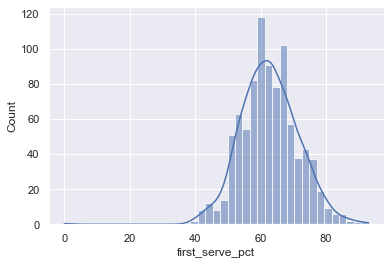

In [41]:
ax = sns.histplot(w_tennis['first_serve_pct'], kde=True)

This is about what I would expect. 60% percentage of of first serve is typically the normal across most tennis matches. This is typically an important stat meaning the opponent will have less break points, etc.

## First serves won

In [42]:
w_tennis['first_serves_won'].describe()

count    904.000000
mean      27.550885
std       10.325042
min        0.000000
25%       21.000000
50%       26.000000
75%       34.000000
max       58.000000
Name: first_serves_won, dtype: float64

It's interesting to me that there is a min of 0. I would assume that these are walkover matches (i.e. matches where the opponent defaulted or withdrew for one reason or another.) I'm used to seeing number's for men's tennis which are typically longer matches so the number of first serves won having a mean of 27 seems a bit suspicious to me

According to http://www.tennisabstract.com/blog/category/match-length/

The average women's pro match is around 139 points. I suppose, presumably a player is only serving half those points and 60% of those points served are first serves this number is not all too ridiculous.

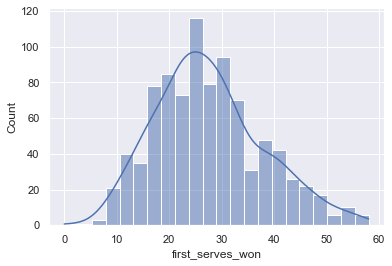

In [43]:
ax = sns.histplot(w_tennis['first_serves_won'], kde=True)

I'm not sure if I should be surprised if tennis data didn't follow a normal distribution since a large amount of training focuses on consistency. Let's do a hex correlation plot with first serve percentage.

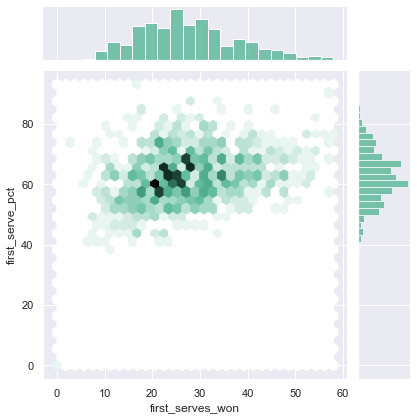

In [44]:
sns.jointplot(x=w_tennis['first_serves_won'],y=w_tennis['first_serve_pct'], kind="hex", color="#4CB391")

As one would expect the first serves won can help indicate one's first serve percentage.

## Second Serve Won

When correlated with a low first serve percentage this is by far one of the more important stats in all of tennis.

In [45]:
w_tennis['second_serve_won'].describe()

count    904.000000
mean      11.623894
std        5.190941
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       30.000000
Name: second_serve_won, dtype: float64

I guess these numbers make sense. It will likely be less than first serves won. A player on average serves their second serve less than their first if they are serving at the 60% average.

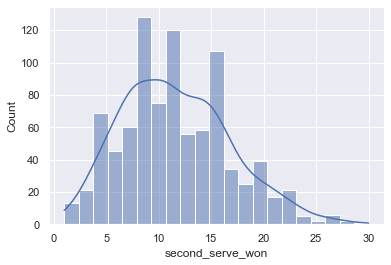

In [46]:
ax = sns.histplot(w_tennis['second_serve_won'], kde=True)

This is normalish. There is likely something significant about the spikes being around values of 5. Let's correlate this with first serve percentage.

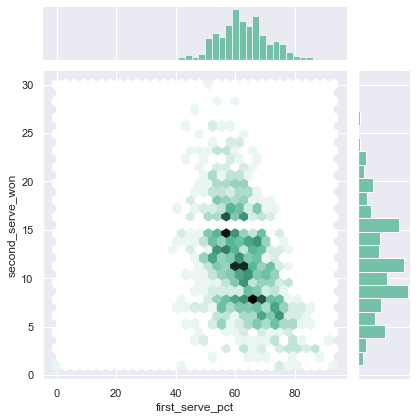

In [47]:
sns.jointplot(x=w_tennis['first_serve_pct'],y=w_tennis['second_serve_won'], kind="hex", color="#4CB391")

Not surprising that the lower the first serve percentage, the more second serves a given player would have to win.

## Aces

Aces are another terms for winner off of the serve (i.e. The opponent did not get a 'play' at the ball or their racquet didn't touch the ball).

I'm going to say that having a large number of aces is a good stat but there are contextual dynamics that lead aces to winning a match. Notably when they occur in the set, game, etc.

In [48]:
w_tennis['aces'].describe()

count    904.000000
mean       2.679867
std        2.603880
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: aces, dtype: float64

With a few exceptions, Women's tennis isn't known for their large servers so these values don't suprise me. I don't think this stat will be useful at all. I'd much rather have a stat like % serves returned.

## Double Faults

Much like aces these matter in terms of when they occur. These numbers should be low.

In [49]:
w_tennis['double_faults'].describe()

count    904.000000
mean       3.355088
std        2.473760
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       13.000000
Name: double_faults, dtype: float64

Typically, when thinking of the serve it's imporntant to weigh the number of aces to the number of double faults. I.E. the number of free points the serve gets vs. the number of free points the player gives on serve.

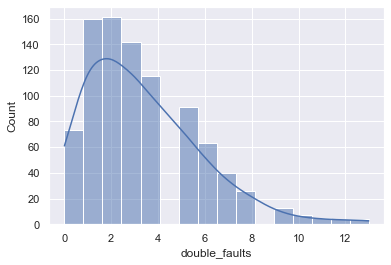

In [50]:
ax = sns.histplot(w_tennis['double_faults'], kde=True)

I am not surprised that this looks like a poisson distribution. I would venture to make the educated guess that the more DF a player has the more likely they are to lose. Typically not a good sign for the rest of a player's game if they can't successfully serve consistently.

## Winners

Much like with DF and Aces this is a tradeoffs with the unforced error stat. Although UE are far more important to predicting the loser of a match. I'd argue that winners and losers will have a simialr number of winners but a larger disparity in UE.

In [51]:
w_tennis['winners'].describe()

count    904.000000
mean      20.451327
std       10.650486
min        0.000000
25%       13.000000
50%       20.000000
75%       27.000000
max       67.000000
Name: winners, dtype: float64

Wow, a max of 67 winners? Seems a bit ridiculous.

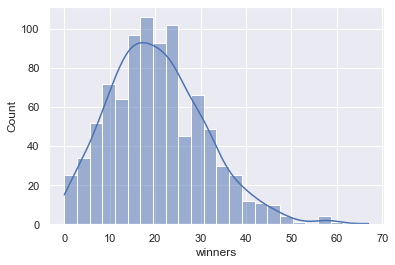

In [52]:
ax = sns.histplot(w_tennis['winners'], kde=True)

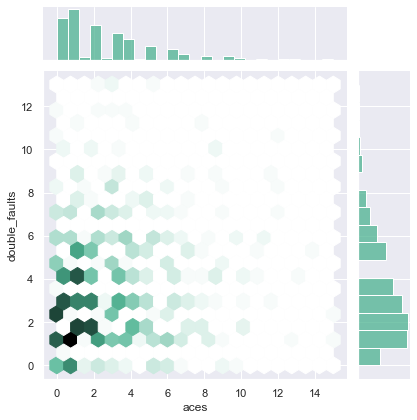

In [53]:
sns.jointplot(x=w_tennis['aces'],y=w_tennis['double_faults'], kind="hex", color="#4CB391")

## Unforced Errors.

In [54]:
w_tennis['unforced_error'].describe()

count    904.000000
mean      24.350664
std       12.577372
min        0.000000
25%       15.000000
50%       23.000000
75%       32.000000
max       73.000000
Name: unforced_error, dtype: float64

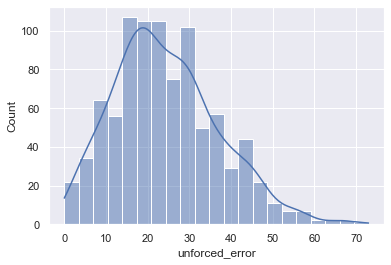

In [55]:
ax = sns.histplot(w_tennis['unforced_error'], kde=True)

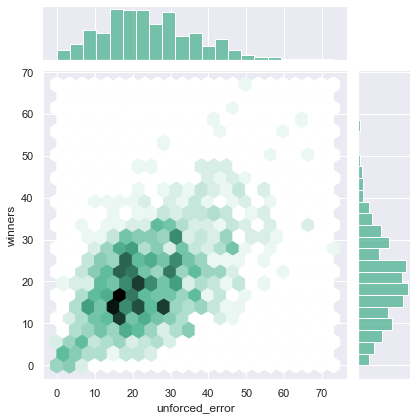

In [56]:
sns.jointplot(x=w_tennis['unforced_error'],y=w_tennis['winners'], kind="hex", color="#4CB391")

Remember when I said there were tradeoff stats. Typically a player aims to 'balance' these stats in a match.

## Break Points and Break Points Won

A player with more break point opportunities and break points won will be more likely to win a match. Break points are when a returning player has the opportunity to win the game. Servers are considered to have the advantage.

In [57]:
w_tennis['break_points'].describe()

count    904.000000
mean       5.642920
std        3.982555
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       25.000000
Name: break_points, dtype: float64

In [58]:
w_tennis['break_point_won'].describe()

count    904.000000
mean       6.120354
std        4.213203
min        0.000000
25%        3.000000
50%        5.000000
75%        9.000000
max       24.000000
Name: break_point_won, dtype: float64

It's good to see how correlated these values are. It is a bit interesting that players won more break points on average than break points were created. I double checked the feature ordering to make sure I didn't mix them up in the column reordering but this is correct...

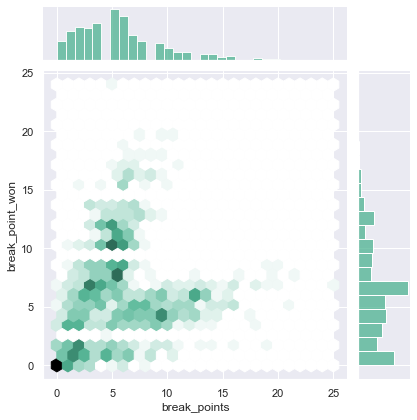

In [59]:
sns.jointplot(x=w_tennis['break_points'],y=w_tennis['break_point_won'], kind="hex", color="#4CB391")

## Net Points Attempted and Net Points Won

In modern tennis going to the net isn't exactly something that happens all too often. Although it is still considered the power position of a given point. So presumably the player who consistently wins net points are lilely to win the match.

In [60]:
w_tennis['net_points_attempted'].describe()

count    904.000000
mean      10.923230
std        8.670163
min        0.000000
25%        5.000000
50%        9.000000
75%       14.000000
max       71.000000
Name: net_points_attempted, dtype: float64

In [61]:
w_tennis['net_points_won'].describe()

count    904.000000
mean      10.592699
std        7.448367
min        0.000000
25%        5.000000
50%        9.000000
75%       14.000000
max       62.000000
Name: net_points_won, dtype: float64

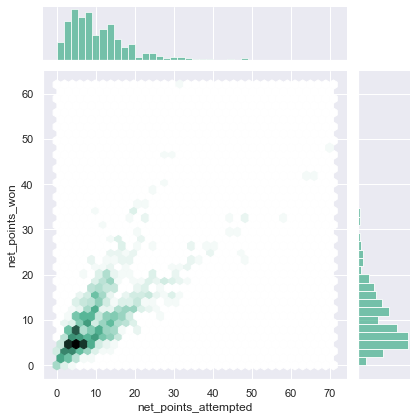

In [62]:
sns.jointplot(x=w_tennis['net_points_attempted'],y=w_tennis['net_points_won'], kind="hex", color="#4CB391")

## Total Points Won

I don't like this feature becasue 42% of the data was missing in the dataset. But in most cases the player who won the most points won the match. There are rare exceptions to this however.

In [63]:
w_tennis['total_points_won'].describe()

count    904.000000
mean      68.916372
std       21.060057
min        1.000000
25%       56.000000
50%       66.000000
75%       83.000000
max      135.000000
Name: total_points_won, dtype: float64

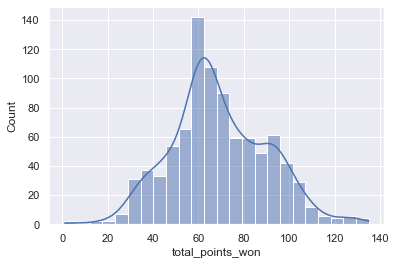

In [64]:
ax = sns.histplot(w_tennis['total_points_won'], kde=True)

Well remember I said that the average match is 139 points so around 60 points on average for a player to win seems abuot right. Although, I feel like this number is inflated because of a good amount of missing data.

## Won Set 1 & 2

Players who win the first set are likely to win the match because it boosts confidence of the winner and lowers the confidence of the loser. This is a sligth generalization because mental toughness varies player to player but I think that this is likely the case.

In [65]:
w_tennis['won_set_1'].describe()

count    904.000000
mean       4.587611
std        2.018898
min        0.000000
25%        3.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: won_set_1, dtype: float64

Oh, this is the number of games won in the set.

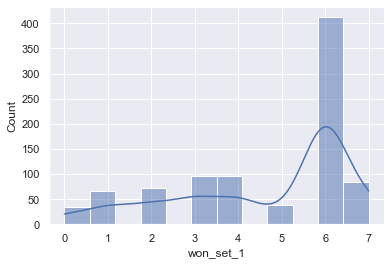

In [66]:
ax = sns.histplot(w_tennis['won_set_1'], kde=True)

If a player won 6 or 7 games they won the set. If they won less than that amount of games they lost the set.

In [67]:
w_tennis['won_set_2'].describe()

count    904.000000
mean       4.500664
std        2.066341
min        0.000000
25%        3.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: won_set_2, dtype: float64

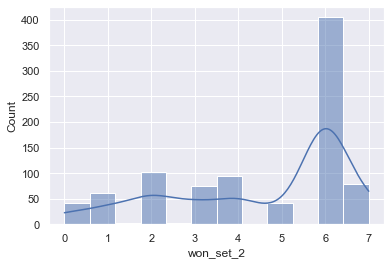

In [68]:
ax = sns.histplot(w_tennis['won_set_2'], kde=True)

It's interesting that the distribution for the number of games won that are less than 6 didn't flutuate much. I suppose this has something to do with the scoring format in tennis though.

## Do C Means of the Women's Tennis Data Set.


There isn't any other feature that I would like to cut from the dataset tso i will move forward with this.

In [69]:
temp = w_tennis.final_games_won
del w_tennis['final_games_won']

In [70]:
w_tennis['final_games_won'] = temp

In [71]:
import skfuzzy as fuzz
from sklearn.preprocessing import Normalizer, MinMaxScaler, RobustScaler
X = MinMaxScaler((0,1)).fit_transform(RobustScaler().fit_transform(Normalizer().fit_transform(w_tennis)))

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, w_labels)

In [74]:
# Set up the loop and plot
def plot_nclusters(X_train, x, y):
    fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
    fpcs = []

    colors = ['b', 'orange', 'g', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen', 'Purple']
    for ncenters, ax in enumerate(axes1.reshape(-1), 2):
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X_train.T, ncenters, 2, error=0.005, maxiter=1000, init=None, seed=[3523523])

        # Store fpc values for later
        fpcs.append(fpc)

        # Plot assigned clusters, for each data point in training set
        cluster_membership = np.argmax(u, axis=0)
        for j in range(ncenters):
            ax.plot(X_train.T[x, u.argmax(axis=0) == j],
                    X_train.T[y, u.argmax(axis=0) == j], '.', color=colors[j])

        # Mark the center of each fuzzy cluster
        for pt in cntr:
            ax.plot(pt[x], pt[y], 'rs')

        ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
        ax.axis('off')

    fig1.tight_layout()
    return fpcs

In [75]:
def plot_fpcs(fpcs, name):
    fig2, ax2 = plt.subplots()
    ax2.plot(np.r_[2:11], fpcs)
    ax2.set_xlabel("Number of " + name)
    ax2.set_ylabel("Fuzzy partition coefficient")

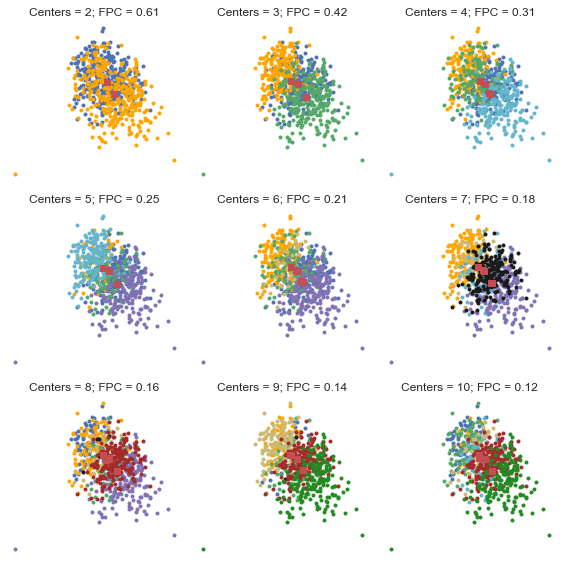

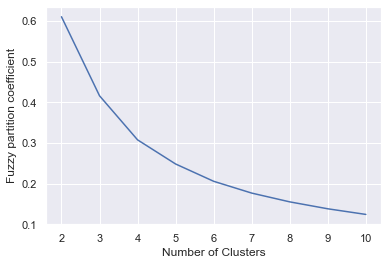

In [76]:
plot_fpcs(plot_nclusters(X_train, w_tennis.columns.get_loc('first_serve_pct'), w_tennis.columns.get_loc('first_serves_won')), 'Clusters')

Okay do I think the 3 centers is the best bet. But I can't see the cluster centers. Let's try 3D plotting to get a better look at the plane

In [77]:
from mpl_toolkits import mplot3d

In [78]:
%matplotlib notebook

<IPython.core.display.Javascript object>


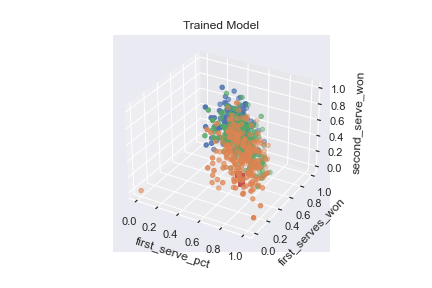

Text(0.5, 0, 'second_serve_won')

In [79]:
axis_names = ['first_serve_pct', 'first_serves_won', 'second_serve_won']
cntr, u, u0, d ,jm, p, fpc = fuzz.cmeans(X_train.T, 3, 2, 0.005, 1000, seed=[423423])
cluster_membership = np.argmax(u, axis=0)
sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_title('Trained Model')
for j in range(4):
    ax.scatter(X_train[cluster_membership == j, w_tennis.columns.get_loc('first_serve_pct')],
            X_train[cluster_membership == j, w_tennis.columns.get_loc('first_serves_won')],
            X_train[cluster_membership == j, w_tennis.columns.get_loc('second_serve_won')])
for pt in cntr:
    ax.plot(pt[w_tennis.columns.get_loc('first_serve_pct')], pt[w_tennis.columns.get_loc('first_serves_won')], 'rs')
ax.set_xlabel(axis_names[0])
ax.set_ylabel(axis_names[1])
ax.set_zlabel(axis_names[2])

In [80]:
cntr

array([[0.55526027, 0.63705308, 0.27658578, 0.48360631, 0.18712465,
        0.24598625, 0.46607968, 0.46326997, 0.28391555, 0.30007641,
        0.24462764, 0.20976464, 0.74774111, 0.57016907, 0.54707465,
        0.5504674 , 0.44607265],
       [0.64929704, 0.52572452, 0.34213032, 0.39451094, 0.13514791,
        0.27154925, 0.36732253, 0.49121117, 0.17866713, 0.19249257,
        0.21833727, 0.18466225, 0.62700619, 0.41705163, 0.39512489,
        0.51967131, 0.10452076],
       [0.59720445, 0.61741726, 0.28496465, 0.45934731, 0.21206175,
        0.19199542, 0.46202894, 0.35636463, 0.3339469 , 0.35395961,
        0.21646735, 0.18509616, 0.7417273 , 0.75311021, 0.73111082,
        0.55467085, 0.75671189]])

Okay, so I can see that given a feature the center is basically in the same exact spot per cluster. Hmmm. Let's look at the other 

## Tune M

In [81]:
# Set up the loop and plot
def plot_m(X_train, ncenters, x, y):
    fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
    fpcs = []

    colors = ['b', 'orange', 'g', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen', 'Purple']
    for m, ax in enumerate(axes1.reshape(-1), 2):
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X_train.T, ncenters, m, error=0.005, maxiter=1000, init=None, seed=[3523523])

        # Store fpc values for later
        fpcs.append(fpc)

        # Plot assigned clusters, for each data point in training set
        cluster_membership = np.argmax(u, axis=0)
        for j in range(m):
            ax.plot(X_train.T[x, u.argmax(axis=0) == j],
                    X_train.T[y, u.argmax(axis=0) == j], '.', color=colors[j])

        # Mark the center of each fuzzy cluster
        for pt in cntr:
            ax.plot(pt[x], pt[y], 'rs')

        ax.set_title('m = {0}; FPC = {1:.2f}'.format(m, fpc))
        ax.axis('off')

    fig1.tight_layout()
    return fpcs

<IPython.core.display.Javascript object>


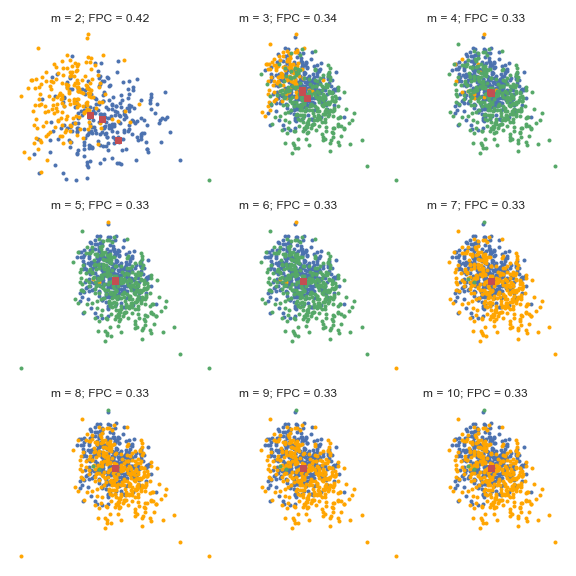

<IPython.core.display.Javascript object>


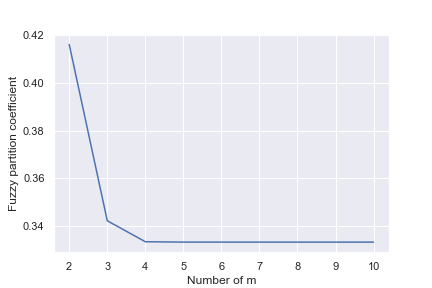

In [82]:
plot_fpcs(plot_m(X_train, 3, w_tennis.columns.get_loc('first_serve_pct'), w_tennis.columns.get_loc('first_serves_won')), 'm')

## Tune MaxIter

In [83]:
# Set up the loop and plot
def plot_maxIter(X_train, ncenters, m, iterList, x, y):
    fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
    fpcs = []

    colors = ['b', 'orange', 'g', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen', 'Purple']
    for i, ax in enumerate(axes1.reshape(-1), 2):
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X_train.T, ncenters, m, error=0.005, maxiter=iterList[i], init=None, seed=[3523523])

        # Store fpc values for later
        fpcs.append(fpc)

        # Plot assigned clusters, for each data point in training set
        cluster_membership = np.argmax(u, axis=0)
        for j in range(i):
            ax.plot(X_train.T[x, u.argmax(axis=0) == j],
                    X_train.T[y, u.argmax(axis=0) == j], '.', color=colors[j])

        # Mark the center of each fuzzy cluster
        for pt in cntr:
            ax.plot(pt[x], pt[y], 'rs')

        ax.set_title('maxIter = {0}; FPC = {1:.2f}'.format(iterList[i], fpc))
        ax.axis('off')

    fig1.tight_layout()
    return fpcs

<IPython.core.display.Javascript object>


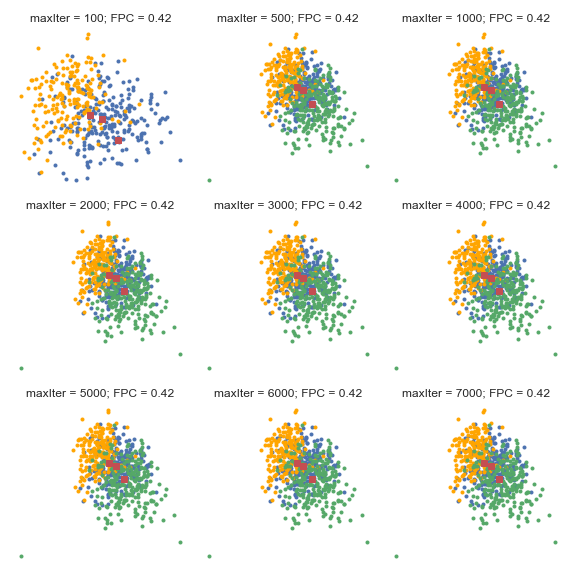

<IPython.core.display.Javascript object>


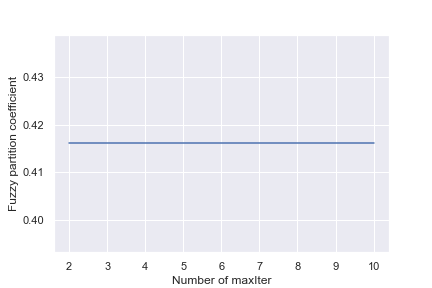

In [84]:
iter_list = [_, _, 100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
plot_fpcs(plot_maxIter(X_train, 3, 2, iter_list, w_tennis.columns.get_loc('first_serve_pct'), w_tennis.columns.get_loc('first_serves_won')), 'maxIter')

Nothing much to tune outside the number of centers in this algorithm.

In [85]:
axis_names = ['first_serve_pct', 'first_serves_won', 'second_serve_won']

In [86]:
def get_trained_model(X_train, ncenters, m, maxiter, x, y, z, axis_names):
    cntr, u, u0, d ,jm, p, fpc = fuzz.cmeans(X_train.T, ncenters, m, 0.005, maxiter, seed=[423423])
    cluster_membership = np.argmax(u, axis=0)
    sns.set(style = "darkgrid")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.set_title('Trained Model')
    for j in range(4):
        ax.scatter(X_train[cluster_membership == j, x],
                X_train[cluster_membership == j, y],
                X_train[cluster_membership == j, z])
    for pt in cntr:
        ax.plot(pt[x], pt[y], 'rs')
    ax.set_xlabel(axis_names[0])
    ax.set_ylabel(axis_names[1])
    ax.set_zlabel(axis_names[2])
    return cntr

<IPython.core.display.Javascript object>


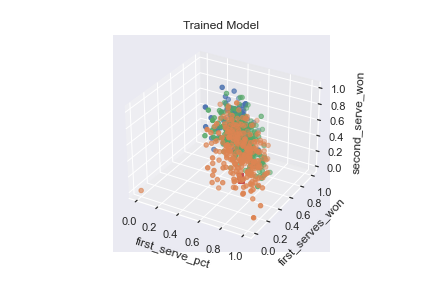

In [87]:
axis_names = ['first_serve_pct', 'first_serves_won', 'second_serve_won']
x = w_tennis.columns.get_loc('first_serve_pct')
y = w_tennis.columns.get_loc('first_serves_won')
z = w_tennis.columns.get_loc('second_serve_won')
model = get_trained_model(X_train, 3, 3, 1000, x, y, z, axis_names)

In [88]:
def test_model(X_test,ncenters, model, x, y, z, axis_names):
    u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
        X_test.T, model, 3, error=0.005, maxiter=1000)
    cluster_membership = np.argmax(u, axis=0)
    sns.set(style = "darkgrid")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    for j in range(ncenters):
        ax.scatter(X_test[cluster_membership == j, x],
                X_test[cluster_membership == j, y],
                X_test[cluster_membership == j, z])
    ax.set_xlabel(axis_names[0])
    ax.set_ylabel(axis_names[1])
    ax.set_zlabel(axis_names[2])
    plt.show()
    return fpc

<IPython.core.display.Javascript object>


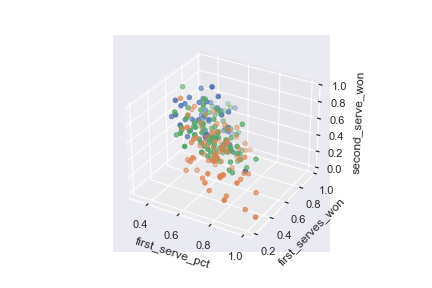

In [89]:
axis_names = ['first_serve_pct', 'first_serves_won', 'second_serve_won']
fpc = test_model(X_test, 3, model, x, y, z, axis_names)

In [90]:
print(fpc)

0.3409196407516135


## Men's Tennis Data

In [91]:
m_aus_open = pd.read_csv('./datasets/AusOpen-men-2013.csv')
m_french_open = pd.read_csv('./datasets/FrenchOpen-men-2013.csv')
m_wimby = pd.read_csv('./datasets/Wimbledon-men-2013.csv')
m_us_open = pd.read_csv('./datasets/USOpen-men-2013.csv')

In [92]:

m_us_open = m_us_open.rename(columns={"Player 1": "Player1", "Player 2": "Player2", "ST2.1.1": "ST1.2", "ROUND": "Round", "FNL1" : "FNL.1", "FNL2": "FNL.2"})
m_wimby = m_wimby.rename(columns={"ST1.1.1": "ST1.2", "FNL1" : "FNL.1", "FNL2": "FNL.2"})
m_aus_open = m_aus_open.rename(columns={"FNL1" : "FNL.1", "FNL2": "FNL.2"})

In [93]:
frames = [m_aus_open, m_french_open, m_wimby, m_us_open]
m_tennis = pd.concat(frames)

In [94]:
determine_data_types(m_tennis)

{'Player1': 'Categorical',
 'Player2': 'Categorical',
 'Round': 'Numerical',
 'Result': 'Numerical',
 'FNL.1': 'Numerical',
 'FNL.2': 'Numerical',
 'FSP.1': 'Numerical',
 'FSW.1': 'Numerical',
 'SSP.1': 'Numerical',
 'SSW.1': 'Numerical',
 'ACE.1': 'Numerical',
 'DBF.1': 'Numerical',
 'WNR.1': 'Numerical',
 'UFE.1': 'Numerical',
 'BPC.1': 'Numerical',
 'BPW.1': 'Numerical',
 'NPA.1': 'Numerical',
 'NPW.1': 'Numerical',
 'TPW.1': 'Numerical',
 'ST1.1': 'Numerical',
 'ST2.1': 'Numerical',
 'ST3.1': 'Numerical',
 'ST4.1': 'Numerical',
 'ST5.1': 'Numerical',
 'FSP.2': 'Numerical',
 'FSW.2': 'Numerical',
 'SSP.2': 'Numerical',
 'SSW.2': 'Numerical',
 'ACE.2': 'Numerical',
 'DBF.2': 'Numerical',
 'WNR.2': 'Numerical',
 'UFE.2': 'Numerical',
 'BPC.2': 'Numerical',
 'BPW.2': 'Numerical',
 'NPA.2': 'Numerical',
 'NPW.2': 'Numerical',
 'TPW.2': 'Numerical',
 'ST1.2': 'Numerical',
 'ST2.2': 'Numerical',
 'ST3.2': 'Numerical',
 'ST4.2': 'Numerical',
 'ST5.2': 'Numerical'}

In [95]:
check_missing_values(m_tennis, m_tennis.columns)

Index(['Dataset: Player1', 'Dataset: Player2', 'Dataset: Round',
       'Dataset: Result', 'Dataset: FNL.1', 'Dataset: FNL.2', 'Dataset: FSP.1',
       'Dataset: FSW.1', 'Dataset: SSP.1', 'Dataset: SSW.1', 'Dataset: ACE.1',
       'Dataset: DBF.1', 'Dataset: WNR.1', 'Dataset: UFE.1', 'Dataset: BPC.1',
       'Dataset: BPW.1', 'Dataset: NPA.1', 'Dataset: NPW.1', 'Dataset: TPW.1',
       'Dataset: ST1.1', 'Dataset: ST2.1', 'Dataset: ST3.1', 'Dataset: ST4.1',
       'Dataset: ST5.1', 'Dataset: FSP.2', 'Dataset: FSW.2', 'Dataset: SSP.2',
       'Dataset: SSW.2', 'Dataset: ACE.2', 'Dataset: DBF.2', 'Dataset: WNR.2',
       'Dataset: UFE.2', 'Dataset: BPC.2', 'Dataset: BPW.2', 'Dataset: NPA.2',
       'Dataset: NPW.2', 'Dataset: TPW.2', 'Dataset: ST1.2', 'Dataset: ST2.2',
       'Dataset: ST3.2', 'Dataset: ST4.2', 'Dataset: ST5.2'],
      dtype='object')
> Player1, Missing: 0 (0.0%)
> Player2, Missing: 0 (0.0%)
> Round, Missing: 0 (0.0%)
> Result, Missing: 0 (0.0%)
> FNL.1, Missing: 0 (0.0%)

In [96]:
del m_tennis["Player1"]
del m_tennis["Player2"]

In [97]:
check_missing_values(m_tennis, m_tennis.columns)

Index(['Dataset: Round', 'Dataset: Result', 'Dataset: FNL.1', 'Dataset: FNL.2',
       'Dataset: FSP.1', 'Dataset: FSW.1', 'Dataset: SSP.1', 'Dataset: SSW.1',
       'Dataset: ACE.1', 'Dataset: DBF.1', 'Dataset: WNR.1', 'Dataset: UFE.1',
       'Dataset: BPC.1', 'Dataset: BPW.1', 'Dataset: NPA.1', 'Dataset: NPW.1',
       'Dataset: TPW.1', 'Dataset: ST1.1', 'Dataset: ST2.1', 'Dataset: ST3.1',
       'Dataset: ST4.1', 'Dataset: ST5.1', 'Dataset: FSP.2', 'Dataset: FSW.2',
       'Dataset: SSP.2', 'Dataset: SSW.2', 'Dataset: ACE.2', 'Dataset: DBF.2',
       'Dataset: WNR.2', 'Dataset: UFE.2', 'Dataset: BPC.2', 'Dataset: BPW.2',
       'Dataset: NPA.2', 'Dataset: NPW.2', 'Dataset: TPW.2', 'Dataset: ST1.2',
       'Dataset: ST2.2', 'Dataset: ST3.2', 'Dataset: ST4.2', 'Dataset: ST5.2'],
      dtype='object')
> Round, Missing: 0 (0.0%)
> Result, Missing: 0 (0.0%)
> FNL.1, Missing: 0 (0.0%)
> FNL.2, Missing: 0 (0.0%)
> FSP.1, Missing: 0 (0.0%)
> FSW.1, Missing: 0 (0.0%)
> SSP.1, Missing: 0 (0.

In [98]:
res = []
for col in m_tennis.columns:
    if '.2' in col:
        res.append(col)

In [99]:
selected_columns = m_tennis[res]

In [100]:
player_2 = selected_columns.copy()

In [101]:
player_2 = pd.concat([player_2, m_tennis["Result"]], axis=1)

In [102]:
player_2["Result"] = player_2["Result"].replace({0:1, 1:0})

In [103]:
res = []
for col in m_tennis.columns:
    if '.1' in col:
        res.append(col)

In [104]:
selected_columns = m_tennis[res]

In [105]:
player_1 = selected_columns.copy()

In [106]:
player_1 = pd.concat([player_1, m_tennis["Result"]], axis=1)

In [107]:
player_2.columns = player_1.columns

In [108]:
player_2 = fill_missing_values(player_2, player_2.columns)

In [109]:
player_1 = fill_missing_values(player_1, player_1.columns)

In [110]:
m_tennis = pd.concat([player_1, player_2])

In [111]:
m_labels = m_tennis["Result"]

In [112]:
del m_tennis["Result"]

In [113]:
m_tennis.columns

Index(['FNL.1', 'FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1',
       'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1',
       'ST3.1', 'ST4.1', 'ST5.1'],
      dtype='object')

In [114]:
column_names = ['final_games_won', 'first_serve_pct', 'first_serves_won', 'second_serve_pct', 'second_serve_won', 'aces', 'double_faults', 'winners', 'unforced_error', 'break_points', 'break_point_won', 'net_points_attempted', 'net_points_won', 'total_points_won', 'won_set_1', 'won_set_2', 'won_set_3', 'won_set_4', 'won_set_5']
m_tennis.columns = column_names
m_tennis.columns

Index(['final_games_won', 'first_serve_pct', 'first_serves_won',
       'second_serve_pct', 'second_serve_won', 'aces', 'double_faults',
       'winners', 'unforced_error', 'break_points', 'break_point_won',
       'net_points_attempted', 'net_points_won', 'total_points_won',
       'won_set_1', 'won_set_2', 'won_set_3', 'won_set_4', 'won_set_5'],
      dtype='object')

## Do Men's Tennis EDA

In [115]:
m_tennis

,final_games_won,first_serve_pct,first_serves_won,second_serve_pct,second_serve_won,aces,double_faults,winners,unforced_error,break_points,break_point_won,net_points_attempted,net_points_won,total_points_won,won_set_1,won_set_2,won_set_3,won_set_4,won_set_5
0,0.0,61.0,35.0,39.0,18.0,5.0,1.0,17.0,29.0,1.0,3.0,8.0,11.0,70.0,3.0,6.0,1.0,2.2,4.4
1,3.0,61.0,31.0,39.0,13.0,13.0,1.0,13.0,1.0,7.0,14.0,10.6,15.0,80.0,6.0,6.0,6.0,1.6,2.4
2,0.0,52.0,53.0,48.0,20.0,8.0,4.0,37.0,50.0,1.0,9.0,16.0,23.0,106.0,4.0,5.0,4.0,2.0,2.0
3,3.0,53.0,39.0,47.0,24.0,8.0,6.0,8.0,6.0,6.0,9.0,12.4,19.6,104.0,6.0,6.0,6.0,1.8,2.6
4,1.0,76.0,63.0,24.0,12.0,0.0,4.0,16.0,35.0,3.0,12.0,9.0,13.0,128.0,6.0,4.0,6.0,2.0,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1.0,56.0,29.0,44.0,23.0,2.0,4.0,22.0,29.4,2.0,10.0,10.0,21.0,87.0,3.0,2.0,6.0,0.0,4.6
487,3.0,55.0,37.0,45.0,20.0,4.0,4.0,21.0,12.4,4.0,11.0,31.0,42.0,107.0,6.0,6.0,6.0,1.2,5.0
488,2.0,50.0,68.0,50.0,48.0,8.0,7.0,43.8,49.2,5.0,9.0,26.0,41.0,165.0,6.0,6.0,6.0,3.0,4.0
489,3.0,71.0,51.0,29.0,16.0,3.0,1.0,40.4,32.6,4.0,4.0,22.0,28.0,102.0,6.0,7.0,6.0,3.0,5.4


In [116]:
X = MinMaxScaler((0,1)).fit_transform(RobustScaler().fit_transform(Normalizer().fit_transform(m_tennis)))

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, m_labels)

<IPython.core.display.Javascript object>


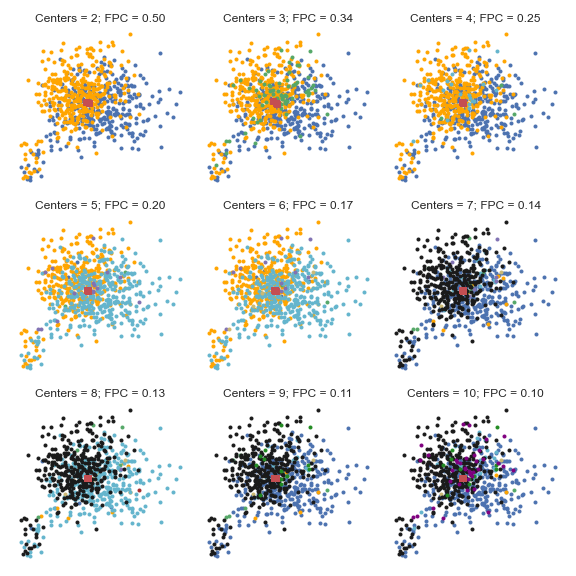

<IPython.core.display.Javascript object>


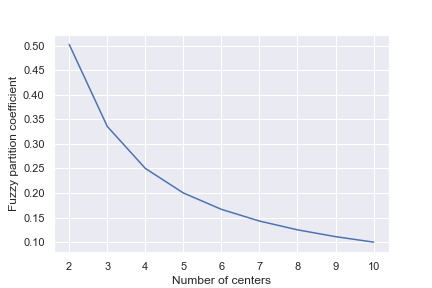

In [118]:
plot_fpcs(plot_nclusters(X_train, m_tennis.columns.get_loc('unforced_error'), m_tennis.columns.get_loc('winners')), 'centers')

<IPython.core.display.Javascript object>


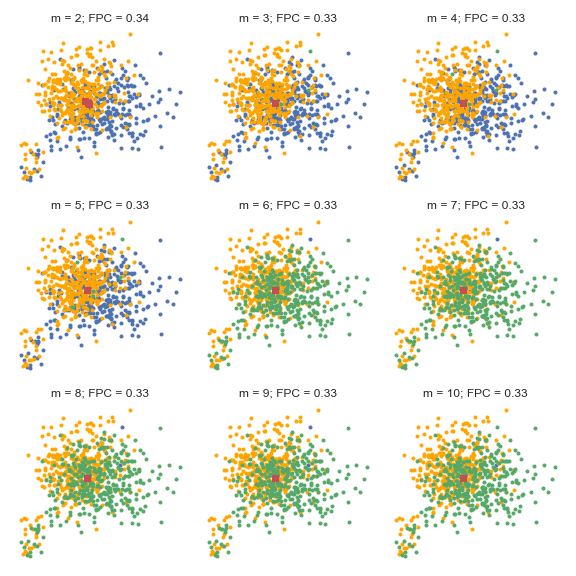

<IPython.core.display.Javascript object>


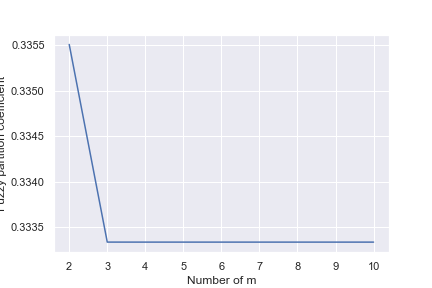

In [119]:
plot_fpcs(plot_m(X_train, 3, m_tennis.columns.get_loc('unforced_error'), m_tennis.columns.get_loc('winners')), 'm')

<IPython.core.display.Javascript object>


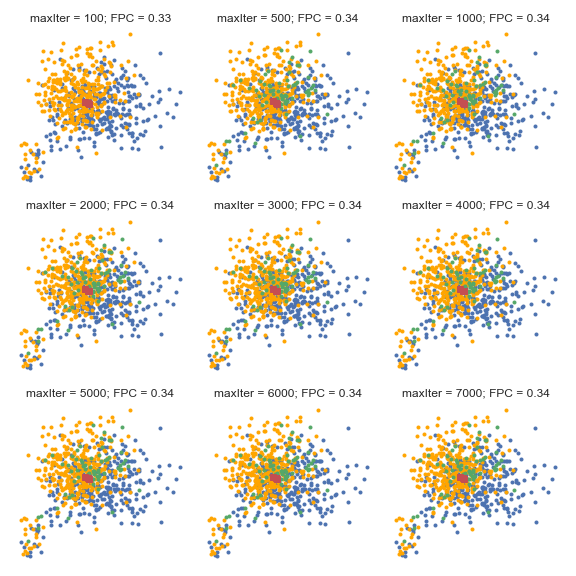

<IPython.core.display.Javascript object>


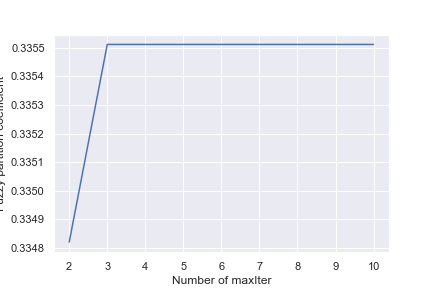

In [120]:
iter_list = [_, _, 100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
plot_fpcs(plot_maxIter(X_train, 3, 2, iter_list, m_tennis.columns.get_loc('unforced_error'), m_tennis.columns.get_loc('winners')), 'maxIter')

<IPython.core.display.Javascript object>


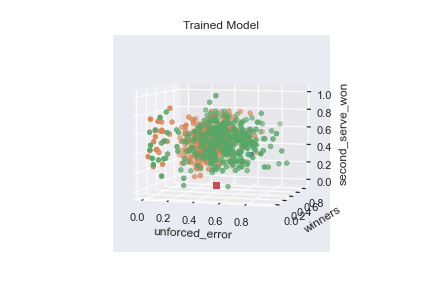

In [121]:
axis_names = ['unforced_error', 'winners', 'second_serve_won']
x = m_tennis.columns.get_loc('unforced_error')
y = m_tennis.columns.get_loc('winners')
z = m_tennis.columns.get_loc('second_serve_won')
model = get_trained_model(X_train, 3, 2, 1000, x, y, z, axis_names)

In [122]:
print(model)

[[0.35662121 0.32994673 0.55099422 0.34543586 0.48168137 0.297224
  0.23903994 0.47418885 0.39793757 0.1956187  0.29046413 0.29576658
  0.29338484 0.74203075 0.43788145 0.49479171 0.55184121 0.46183649
  0.40825933]
 [0.37505436 0.32784241 0.55097119 0.34265241 0.48178424 0.30050604
  0.23567738 0.47693587 0.39295212 0.20193878 0.29732824 0.29500382
  0.29161317 0.74617112 0.4432477  0.50095497 0.56123425 0.46678478
  0.40547617]
 [0.35278499 0.33042079 0.55099696 0.34603144 0.48164401 0.29655965
  0.23972461 0.47363283 0.3989702  0.19429982 0.28900428 0.29593371
  0.29374537 0.74114351 0.43678667 0.49353592 0.54991322 0.4608302
  0.40885249]]


<IPython.core.display.Javascript object>


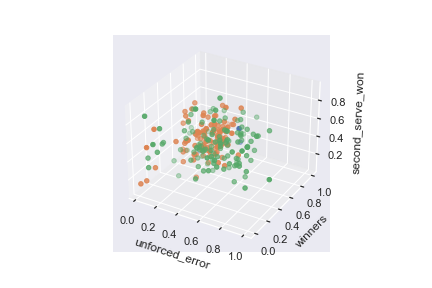

In [123]:
axis_names = ['unforced_error', 'winners', 'second_serve_won']
fpc = test_model(X_test, 3, model, x, y, z, axis_names)

In [124]:
print(fpc)

0.33336784922997553
